# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [11]:
# # Extract all rows of data
# table = soup.find('table')
# # Initialize a list to store all rows of data
# all_rows = []

# # Iterate over each row in the table
# for tr in table.find_all('tr'):
#     # Extract text from each cell in the row
#     td = tr.find_all('td')
#     row = [i.text for i in td]
#     all_rows.append(row)

# Extract all rows of data that have a class of 'data-row'
all_rows = soup.find_all('tr', class_='data-row')

# Accessing the first row from the extracted rows
first_row = all_rows[0]

# Extract data from each cell in the first row
for cell in first_row.find_all('td'):
    print(cell.get_text())


2
2012-08-16
10
155
6
-75.0
739.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Create an empty list
# Initialize the empty list
row_list = []

# # Loop through the scraped data to create a list of rows
for row in all_rows:
    # Extract data from each cell in the row
    cells = row.find_all('td')
    row_list.append(cells)

# Now row_list contains all the rows' data

# Define column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a list of dictionaries
list_of_dicts = []
for row in row_list:
    # Extract text from each cell in the row and create a dictionary
    row_values = [td.text for td in row]
    row_dict = dict(zip(column_names, row_values))
    list_of_dicts.append(row_dict)

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(list_of_dicts)

# Display the first few rows of the DataFrame to confirm it was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'min_temp', and 'pressure' to numeric types
# 'sol' and 'ls' might be integers, while 'min_temp' and 'pressure' might be floats
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')


In [20]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                       object
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [22]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
unique_months

12

In [23]:
# 2. How many Martian days' worth of data are there?
unique_sols = df['sol'].nunique()
unique_sols

1867

In [24]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Displaying the average low temperature by month
average_low_temp_by_month

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64

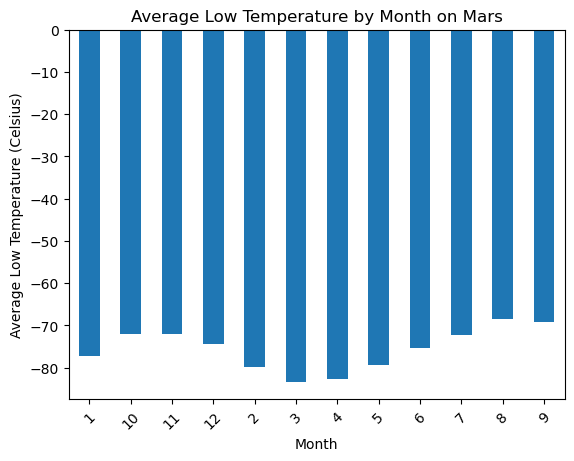

In [25]:
# Plot the average temperature by month
# Converting the dictionary to a Pandas Series for plotting
average_low_temp_series = pd.Series(average_low_temp_by_month, name="Average Low Temperature")

# Plotting
average_low_temp_series.plot(kind='bar', title='Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.xticks(rotation=45)
plt.show()

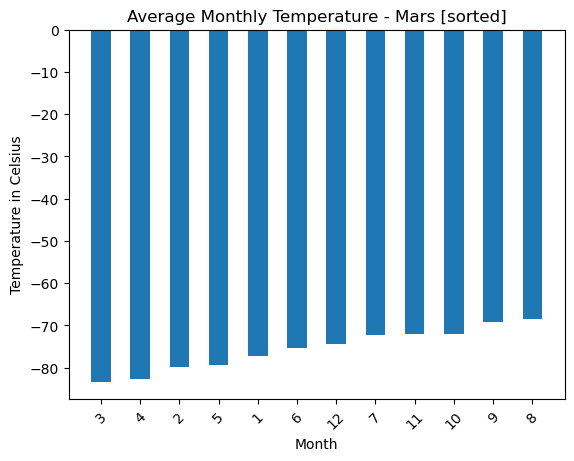

The coldest month is 3.
The hottest month is 8.


In [27]:
# Identify the coldest and hottest months in Curiosity's location
# Calculate the average low temperature for each month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the average temperatures
low_temp_mean_sorted = average_low_temp_by_month.sort_values()

# Now you can use low_temp_mean_sorted for plotting and analysis
x_axis = low_temp_mean_sorted.index.astype(str)
y_axis = low_temp_mean_sorted.values

# Plotting
plt.bar(x_axis, y_axis, width=0.5)
plt.title('Average Monthly Temperature - Mars [sorted]')
plt.ylabel('Temperature in Celsius')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

# Identifying the coldest and hottest months
coldest_month = low_temp_mean_sorted.idxmin()
hottest_month = low_temp_mean_sorted.idxmax()

# Displaying the results
print(f"The coldest month is {coldest_month}.")
print(f"The hottest month is {hottest_month}.")

In [28]:
# 4. Average pressure by Martian month
# Calculate the average pressure for each month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Displaying the average pressure by month
average_pressure_by_month

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

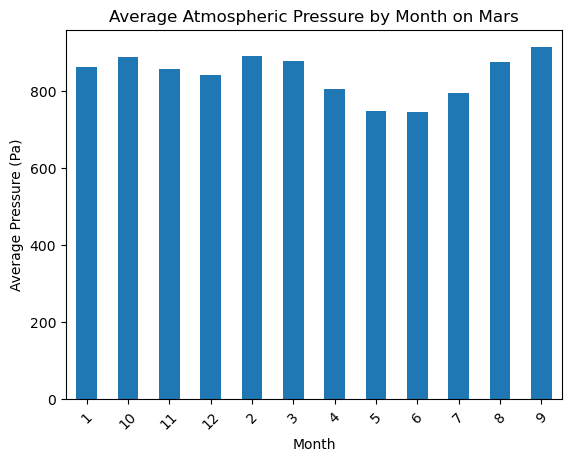

In [29]:
# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar', title='Average Atmospheric Pressure by Month on Mars')
plt.ylabel('Average Pressure (Pa)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

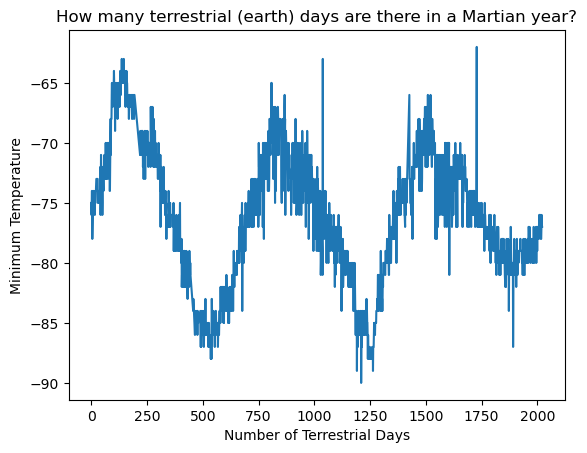

,id,terrestrial_date,sol,ls,month,min_temp,pressure,day_num
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4


In [33]:
# 5. How many terrestrial (earth) days are there in a Martian year?

df['day_num'] = (df['terrestrial_date'] - df['terrestrial_date'].min()).dt.days

                 
x_axis = df['day_num']
y_axis = df['min_temp']
            
plt.plot(x_axis, y_axis)
plt.title('How many terrestrial (earth) days are there in a Martian year?')
plt.ylabel('Minimum Temperature')
plt.xlabel('Number of Terrestrial Days')

plt.show()
df.head()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [34]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [35]:
browser.quit()